# Деньги вкладчиков в надёжных руках: реальные расходы банков

Открытые данные сложны для работы, так как они могут содержать нерелевантную информацию. Зачастую данные представлены в разрозненном виде и первоначально сложны для анализа, поэтому требуют очистки и корректировки. Мой проект основан на открытых данных по заказам пяти крупных банков России, анализ которых позволит выявить основные статьи расходов данных финансовых учреждений. 

## Актуальность: 

* В России исторически сложилось **недоверие к банковскому сектору**. Именно поэтому тема изучения банковских затрат является весьма насущной для нашей страны. 

* Кроме того, **вторую строку после операционных расходов банка (непосредственно связанных с банковскими операциями) занимают затраты по обеспечению функциональной деятельности банка**, поэтому изучение данного вида затрат интересно с точки зрения сумм и наименований. 

## Гипотеза: 

Самыми крупными банковскими затратами по обеспечению функциональной деятельности банка являются затраты на информационную безопасность. 

**Затраты по обеспечению функциональной деятельности банка:** содержание персонала; амортизационные отчисления; расходы по аренде и ремонту оборудования; содержание автотранспорта; связь и телекоммуникации; канцелярия; уплата налогов; рекламные, маркетинговые и представительские затраты; оплата юридических и аудиторских услуг; IT - безопасность; отчисления в специальные резервы и др.

## Целевая аудитория: 

* Мужчины и женщины; возраст от 25 до 50 лет (именно в таком возрастном диапазоне чаще всего находится платёжеспособное население)
* Доход выше среднего 
* Жители крупных городов 
* Основной канал информации - социальные сети и интернет
* Аудитория пользуется смартфонами, планшетами и компьютерами

## Парсинг

После оценки направления проекта я приступила к парсингу данных c использованием ресурса https://code.ach.gov.ru/sgr/spending-api-docs/-/wikis/home.

Для анализа я выбрала пять банков, контракты которых нашла по ИНН каждого из банков. Банки были выбраны по уровню крупности и авторитетности, а также наличию данных о контрактах на ресурсе.
* **Сбербанк** (ИНН: 7707083893)
* **ВТБ** (ИНН: 7702070139)
* **Россельхозбанк** (ИНН: 7725114488)
* **Промсвязьбанк** (ИНН: 7744000912)
* **Почта Банк** (ИНН: 3232005484)

In [1]:
import requests
import pandas as pd
import json
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline

In [2]:
def parse_contract():
    '''
    Сбербанк (ИНН: 7707083893)
    ВТБ (ИНН: 7702070139)
    Россельхозбанк (ИНН: 7725114488)
    Промсвязьбанк (ИНН: 7744000912)
    Почтабанк (ИНН: 3232005484)
    '''
    list_banks_inn = ['7707083893', '7702070139', '7725114488', '7744000912', '3232005484']
    
    for inn in list_banks_inn:
        url = f'https://api.spending.gov.ru/v1/contracts/select/?customerinn={inn}'
        res = requests.get(url).text

        """if res.status_code != 200:
            raise ConnectionError(res.status_code)"""
        data = json.loads(res)
        count_contract = len(data['contracts']['data'])
        print(count_contract)
        for num in range(count_contract):

            date = []
            date.append(data['contracts']['data'][num]['signDate'])
            price = []
            price.append(data['contracts']['data'][num]['price'])
            regnum =[]
            regnum.append(data['contracts']['data'][num]['regNum'])
            st_date = []
            try:
                st_date.append(data['contracts']['data'][num]['execution']['startDate'])
            except KeyError:
                st_date.append(data['contracts']['data'][num])
            fn_date = []
            try:
                fn_date.append(data['contracts']['data'][num]['execution']['endDate'])
            except KeyError:
                fn_date.append(data['contracts']['data'][num])
            name_customer = []
            name_customer.append(data['contracts']['data'][num]['customer']['fullName'])
            name_service = []
            name_service.append(data['contracts']['data'][num]['products'][0]['name'])
            price_service = []
            try:
                price_service.append(data['contracts']['data'][num]['products'][0]['price'])
            except KeyError:
                price_service.append(data['contracts']['data'][num]['products'][0])
            count_service = []
            try:
                count_service.append(data['contracts']['data'][num]['products'][0]['quantity'])
            except KeyError:
                count_service.append(data['contracts']['data'][num]['products'][0])
            code= []
            code.append(data['contracts']['data'][num]['products'][0]['OKPD2']['code'])
            print(code)
            df = pd.DataFrame(list(zip(date, price, regnum, st_date, fn_date, name_customer, name_service, price_service, count_service, code))).to_csv('final_22.csv', sep=',', header=False, index=False, mode='a', encoding='utf-8')


if __name__ == "__main__":
    parse_contract()

50
['35.30.11.111']
['41.20']
['41.20.40']
['41.20.40']
['35.30.11.111']
['93.2']
['93.2']
['43.21.10.140']
['86.9']
['41.20']
['41.20.40']
['41.20.40']
['41.20']
['41.20.40']
['41.20.40']
['85.4']
['81.10.10.000']
['81.10']
['81.10']
['45.20.11']
['43.22.12.150']
['42.99.29.000']
['81.10.10']
['61.2']
['29.10']
['86.90.1']
['70.22']
['41.20.40']
['26.20.40.140']
['41.20.40']
['14.12']
['41.20.40']
['56.21.19.000']
['41.20.40']
['45.2']
['46.69']
['46.69']
['46.69']
['46.69']
['95.11']
['95.11']
['93.2']
['95.11']
['95.11']
['14.12']
['41.20.40']
['47.30.10.000']
['62.0']
['35.30.11.111']
['41.10.10.000']
50
['61.1']
['74.90.20']
['74.90.20']
['74.90.19']
['73.1']
['74.90.19']
['74.90.19']
['26.20.40']
['73.2']
['74.90.19']
['74.90.19']
['80.10.11']
['74.90.19']
['25.99.21']
['25.99.21']
['25.99.21']
['25.99.21']
['25.99.21']
['25.99.21']
['25.99.21']
['74.90.19']
['73.2']
['61.90.1']
['74.90.20']
['43.21.10']
['74.90.19']
['49.32.11']
['28.23.13.110']
['58.2']
['33.12']
['73.2']
['43.

In [3]:
banks = pd.read_csv('final_22.csv', names=['date', 'price', 'regnum', 
                                           'start_date', 'end_date', 'customer', 
                                           'service','price_service', 'count_service', 'code'])

In [4]:
banks

,date,price,regnum,start_date,end_date,customer,service,price_service,count_service,code
0,2022-03-15T00:00:00,1184465.00,57707083893220018550000,2022-01-01,2023-12-31,"ПУБЛИЧНОЕ АКЦИОНЕРНОЕ ОБЩЕСТВО ""СБЕРБАНК РОССИИ""",Договор теплоснабжения,1184465.0,1,35.30.11.111
1,2022-03-15T00:00:00,1600980.00,57707083893220018660000,2022-03-15,2024-04-04,"ПУБЛИЧНОЕ АКЦИОНЕРНОЕ ОБЩЕСТВО ""СБЕРБАНК РОССИИ""",Выполнение строительно-монтажных работ п,1600980.0,1,41.20
2,2022-03-15T00:00:00,860000.00,57707083893220018680000,2022-03-15,2022-04-28,"ПУБЛИЧНОЕ АКЦИОНЕРНОЕ ОБЩЕСТВО ""СБЕРБАНК РОССИИ""",Выполнение СМР на объектах банка,860000.0,1,41.20.40
3,2022-03-15T00:00:00,6376740.00,57707083893220018690000,2022-03-15,2025-06-15,"ПУБЛИЧНОЕ АКЦИОНЕРНОЕ ОБЩЕСТВО ""СБЕРБАНК РОССИИ""",Выполнение СМР на объектах банка,6376740.0,1,41.20.40
4,2022-03-15T00:00:00,2792832.85,57707083893220018700000,2022-01-01,2025-12-31,"ПУБЛИЧНОЕ АКЦИОНЕРНОЕ ОБЩЕСТВО ""СБЕРБАНК РОССИИ""",Теплоснабжение,2792832.85,1,35.30.11.111
...,...,...,...,...,...,...,...,...,...,...
245,2018-02-12T00:00:00,2867760.00,73232005484180001020000,2018-02-12,{'attachments': {'attachment': [{'url': 'https...,"ПУБЛИЧНОЕ АКЦИОНЕРНОЕ ОБЩЕСТВО ""ПОЧТА БАНК""","Изделия для праздников, карнавалов или прочие ...","{'OKEI': {'code': '796', 'name': 'Штука'}, 'OK...",2980,32.99.51
246,2018-02-07T00:00:00,55513450.26,73232005484180001000000,2018-02-07,{'attachments': {'attachment': [{'url': 'https...,"ПУБЛИЧНОЕ АКЦИОНЕРНОЕ ОБЩЕСТВО ""ПОЧТА БАНК""","Терминалы кассовые, подключаемые к компьютеру ...","{'OKEI': {'code': '796', 'name': 'Штука'}, 'OK...",8618,26.20.12.110
247,2018-02-05T00:00:00,808000.00,73232005484180000990000,{'attachments': {'attachment': [{'url': 'https...,{'attachments': {'attachment': [{'url': 'https...,"ПУБЛИЧНОЕ АКЦИОНЕРНОЕ ОБЩЕСТВО ""ПОЧТА БАНК""","Услуги по обработке данных, размещению и взаим...","{'OKEI': {'code': '876', 'name': 'Условная еди...",1,63.1
248,2018-01-30T00:00:00,15000000.00,73232005484180001010000,2018-01-30,{'attachments': {'attachment': [{'url': 'https...,"ПУБЛИЧНОЕ АКЦИОНЕРНОЕ ОБЩЕСТВО ""ПОЧТА БАНК""",Услуги рекламные,"{'OKEI': {'code': '876', 'name': 'Условная еди...",1,73.1


In [5]:
banks.style.format({'full_price': '{:.2f}'})

,date,price,regnum,start_date,end_date,customer,service,price_service,count_service,code
0,2022-03-15T00:00:00,1184465.000000,57707083893220018550000,2022-01-01,2023-12-31,"ПУБЛИЧНОЕ АКЦИОНЕРНОЕ ОБЩЕСТВО ""СБЕРБАНК РОССИИ""",Договор теплоснабжения,1184465.0,1,35.30.11.111
1,2022-03-15T00:00:00,1600980.000000,57707083893220018660000,2022-03-15,2024-04-04,"ПУБЛИЧНОЕ АКЦИОНЕРНОЕ ОБЩЕСТВО ""СБЕРБАНК РОССИИ""",Выполнение строительно-монтажных работ п,1600980.0,1,41.20
2,2022-03-15T00:00:00,860000.000000,57707083893220018680000,2022-03-15,2022-04-28,"ПУБЛИЧНОЕ АКЦИОНЕРНОЕ ОБЩЕСТВО ""СБЕРБАНК РОССИИ""",Выполнение СМР на объектах банка,860000.0,1,41.20.40
3,2022-03-15T00:00:00,6376740.000000,57707083893220018690000,2022-03-15,2025-06-15,"ПУБЛИЧНОЕ АКЦИОНЕРНОЕ ОБЩЕСТВО ""СБЕРБАНК РОССИИ""",Выполнение СМР на объектах банка,6376740.0,1,41.20.40
4,2022-03-15T00:00:00,2792832.850000,57707083893220018700000,2022-01-01,2025-12-31,"ПУБЛИЧНОЕ АКЦИОНЕРНОЕ ОБЩЕСТВО ""СБЕРБАНК РОССИИ""",Теплоснабжение,2792832.85,1,35.30.11.111
5,2022-03-15T00:00:00,1497727.000000,57707083893220018710000,2022-02-17,2022-03-31,"ПУБЛИЧНОЕ АКЦИОНЕРНОЕ ОБЩЕСТВО ""СБЕРБАНК РОССИИ""",Услуги по организации и проведению актив,1497727.0,1,93.2
6,2022-03-15T00:00:00,19998000.000000,57707083893220018750000,2022-03-04,2022-03-31,"ПУБЛИЧНОЕ АКЦИОНЕРНОЕ ОБЩЕСТВО ""СБЕРБАНК РОССИИ""",Услуги по организации и проведению актив,19998000.0,1,93.2
7,2022-03-15T00:00:00,700000.000000,57707083893220018760000,2022-03-15,2022-05-24,"ПУБЛИЧНОЕ АКЦИОНЕРНОЕ ОБЩЕСТВО ""СБЕРБАНК РОССИИ""",Монтаж и модернизация ЭСБ,700000.0,1,43.21.10.140
8,2022-03-14T00:00:00,5000000.000000,57707083893220018340000,2022-03-14,2022-05-31,"ПУБЛИЧНОЕ АКЦИОНЕРНОЕ ОБЩЕСТВО ""СБЕРБАНК РОССИИ""",Оказание услуг по проведению медицинских,5000000.0,1,86.9
9,2022-03-14T00:00:00,12121579.300000,57707083893220018420000,2022-03-14,2024-06-10,"ПУБЛИЧНОЕ АКЦИОНЕРНОЕ ОБЩЕСТВО ""СБЕРБАНК РОССИИ""",Разработка проектно-сметной документации,12121579.3,1,41.20


In [6]:
banks.shape

(250, 10)

**Размерность:** в общей сложности по данным мы получили 250 строк и 10 колонок

In [7]:
banks.head(5)

,date,price,regnum,start_date,end_date,customer,service,price_service,count_service,code
0,2022-03-15T00:00:00,1184465.00,57707083893220018550000,2022-01-01,2023-12-31,"ПУБЛИЧНОЕ АКЦИОНЕРНОЕ ОБЩЕСТВО ""СБЕРБАНК РОССИИ""",Договор теплоснабжения,1184465.0,1,35.30.11.111
1,2022-03-15T00:00:00,1600980.00,57707083893220018660000,2022-03-15,2024-04-04,"ПУБЛИЧНОЕ АКЦИОНЕРНОЕ ОБЩЕСТВО ""СБЕРБАНК РОССИИ""",Выполнение строительно-монтажных работ п,1600980.0,1,41.20
2,2022-03-15T00:00:00,860000.00,57707083893220018680000,2022-03-15,2022-04-28,"ПУБЛИЧНОЕ АКЦИОНЕРНОЕ ОБЩЕСТВО ""СБЕРБАНК РОССИИ""",Выполнение СМР на объектах банка,860000.0,1,41.20.40
3,2022-03-15T00:00:00,6376740.00,57707083893220018690000,2022-03-15,2025-06-15,"ПУБЛИЧНОЕ АКЦИОНЕРНОЕ ОБЩЕСТВО ""СБЕРБАНК РОССИИ""",Выполнение СМР на объектах банка,6376740.0,1,41.20.40
4,2022-03-15T00:00:00,2792832.85,57707083893220018700000,2022-01-01,2025-12-31,"ПУБЛИЧНОЕ АКЦИОНЕРНОЕ ОБЩЕСТВО ""СБЕРБАНК РОССИИ""",Теплоснабжение,2792832.85,1,35.30.11.111


In [8]:
banks.tail(5)

,date,price,regnum,start_date,end_date,customer,service,price_service,count_service,code
245,2018-02-12T00:00:00,2867760.00,73232005484180001020000,2018-02-12,{'attachments': {'attachment': [{'url': 'https...,"ПУБЛИЧНОЕ АКЦИОНЕРНОЕ ОБЩЕСТВО ""ПОЧТА БАНК""","Изделия для праздников, карнавалов или прочие ...","{'OKEI': {'code': '796', 'name': 'Штука'}, 'OK...",2980,32.99.51
246,2018-02-07T00:00:00,55513450.26,73232005484180001000000,2018-02-07,{'attachments': {'attachment': [{'url': 'https...,"ПУБЛИЧНОЕ АКЦИОНЕРНОЕ ОБЩЕСТВО ""ПОЧТА БАНК""","Терминалы кассовые, подключаемые к компьютеру ...","{'OKEI': {'code': '796', 'name': 'Штука'}, 'OK...",8618,26.20.12.110
247,2018-02-05T00:00:00,808000.00,73232005484180000990000,{'attachments': {'attachment': [{'url': 'https...,{'attachments': {'attachment': [{'url': 'https...,"ПУБЛИЧНОЕ АКЦИОНЕРНОЕ ОБЩЕСТВО ""ПОЧТА БАНК""","Услуги по обработке данных, размещению и взаим...","{'OKEI': {'code': '876', 'name': 'Условная еди...",1,63.1
248,2018-01-30T00:00:00,15000000.00,73232005484180001010000,2018-01-30,{'attachments': {'attachment': [{'url': 'https...,"ПУБЛИЧНОЕ АКЦИОНЕРНОЕ ОБЩЕСТВО ""ПОЧТА БАНК""",Услуги рекламные,"{'OKEI': {'code': '876', 'name': 'Условная еди...",1,73.1
249,2018-01-23T00:00:00,9079064.55,73232005484180000980000,2018-01-23,2018-02-18,"ПУБЛИЧНОЕ АКЦИОНЕРНОЕ ОБЩЕСТВО ""ПОЧТА БАНК""",Услуги по организации конференций и торговых в...,"{'OKEI': {'code': '876', 'name': 'Условная еди...",1,82.30.1


In [9]:
banks.sample(10)

,date,price,regnum,start_date,end_date,customer,service,price_service,count_service,code
26,2022-03-11T00:00:00,9480000.00,57707083893220018390000,2022-03-11,2022-07-15,"ПУБЛИЧНОЕ АКЦИОНЕРНОЕ ОБЩЕСТВО ""СБЕРБАНК РОССИИ""",ОКАЗАНИЕ КОНСУЛЬТАЦИОННЫХ УСЛУГ,9480000.0,1,70.22
181,2022-02-24T00:00:00,15750000.00,57744000912220001540000,2022-02-24,2023-02-24,"ПУБЛИЧНОЕ АКЦИОНЕРНОЕ ОБЩЕСТВО ""ПРОМСВЯЗЬБАНК""","Услуги по постоянному трудоустройству, кроме у...",1.0,"{'OKPD2': {'code': '78.10.12', 'name': 'Услуги...",78.10.12
50,2021-09-13T00:00:00,2570278.21,57702070139210027630000,2021-10-15,2024-12-16,БАНК ВТБ (ПУБЛИЧНОЕ АКЦИОНЕРНОЕ ОБЩЕСТВО),"Телефонная связь (городская, междугородняя, ме...",30598.55,84,61.1
123,2022-03-05T00:00:00,54400.00,57725114488220004490000,2022-03-05,2022-06-30,"АКЦИОНЕРНОЕ ОБЩЕСТВО ""РОССИЙСКИЙ СЕЛЬСКОХОЗЯЙС...",Цветной принтер Epson L1300,54400.0,1,46.51.10.110
118,2022-03-05T00:00:00,1000000.00,57725114488220004430000,2022-03-05,2022-12-31,"АКЦИОНЕРНОЕ ОБЩЕСТВО ""РОССИЙСКИЙ СЕЛЬСКОХОЗЯЙС...",Оказание услуг по систематической перевозке гр...,34332.38,1,49.41.1
93,2021-09-07T00:00:00,2417408.00,57702070139210027060000,2021-09-07,2023-09-07,БАНК ВТБ (ПУБЛИЧНОЕ АКЦИОНЕРНОЕ ОБЩЕСТВО),"Оказание услуг, связанных с организацией перев...",2417408.0,1,49.32.12
197,2022-02-18T00:00:00,6800000.00,57744000912220001390000,2022-02-18,2023-02-18,"ПУБЛИЧНОЕ АКЦИОНЕРНОЕ ОБЩЕСТВО ""ПРОМСВЯЗЬБАНК""","Услуги по постоянному трудоустройству, кроме у...",1.0,"{'OKPD2': {'code': '78.10.12', 'name': 'Услуги...",78.10.12
195,2022-02-18T00:00:00,42000000.00,57744000912220001370000,2022-02-18,2024-12-31,"ПУБЛИЧНОЕ АКЦИОНЕРНОЕ ОБЩЕСТВО ""ПРОМСВЯЗЬБАНК""",Набор рекламных услуг полный,1.0,"{'OKPD2': {'code': '73.11.11', 'name': 'Набор ...",73.11.11
41,2022-03-11T00:00:00,2173500.00,57707083893220018730000,2022-03-11,2022-03-31,"ПУБЛИЧНОЕ АКЦИОНЕРНОЕ ОБЩЕСТВО ""СБЕРБАНК РОССИИ""",Организация мероприятий,2173500.0,1,93.2
190,2022-02-22T00:00:00,1000000.00,57744000912220001430000,2022-02-22,2022-03-31,"ПУБЛИЧНОЕ АКЦИОНЕРНОЕ ОБЩЕСТВО ""ПРОМСВЯЗЬБАНК""","Услуги, предоставляемые рекламными агентствами",1.0,"{'OKPD2': {'code': '73.11.1', 'name': 'Услуги,...",73.11.1


## Первичная обработка данных

In [10]:
banks.columns

Index(['date', 'price', 'regnum', 'start_date', 'end_date', 'customer',
       'service', 'price_service', 'count_service', 'code'],
      dtype='object')

**Из данных были взяты следующие параметры для анализа, которые стали колонками датасета:**

1. **date** - Дата 
2. **price** - Цена 
3. **regnum** - Регистрационный номер 
4. **start_date** - Дата начала выполнения услуг по контракту
5. **end_date** - Дата окончания выполнения услуг по контракту
6. **customer** - Наименование заказчика
7. **service** - Услуга
8. **price_service** - Цена оказываемой услуги
9. **count_service** - Количество оказываемых услуг
10. **code** - Код ОКПД (общероссийский классификатор продукции по видам экономической деятельности)

Для корректной работы с данными необходимо проверить типы данных в каждой из колонок.

In [11]:
banks.dtypes

date              object
price            float64
regnum            object
start_date        object
end_date          object
customer          object
service           object
price_service     object
count_service     object
code              object
dtype: object

Колонки **price_service** и **count_service** имеют тип **object**, однако его замена осложнена тем, что некоторые строки имеют нечисловые значения. 

In [12]:
banks.isnull().sum()

date             0
price            0
regnum           0
start_date       0
end_date         0
customer         0
service          0
price_service    0
count_service    0
code             0
dtype: int64

In [13]:
banks.duplicated().sum()

0

**Пропуски** и **дубликаты** в полученном датасете отсутсвуют.

Создадим конку с корректным отображением даты, назвав её **dateClean**.

In [14]:
banks['dateClean'] = banks['date'].str.replace('T00:00:00', '')

In [15]:
banks

,date,price,regnum,start_date,end_date,customer,service,price_service,count_service,code,dateClean
0,2022-03-15T00:00:00,1184465.00,57707083893220018550000,2022-01-01,2023-12-31,"ПУБЛИЧНОЕ АКЦИОНЕРНОЕ ОБЩЕСТВО ""СБЕРБАНК РОССИИ""",Договор теплоснабжения,1184465.0,1,35.30.11.111,2022-03-15
1,2022-03-15T00:00:00,1600980.00,57707083893220018660000,2022-03-15,2024-04-04,"ПУБЛИЧНОЕ АКЦИОНЕРНОЕ ОБЩЕСТВО ""СБЕРБАНК РОССИИ""",Выполнение строительно-монтажных работ п,1600980.0,1,41.20,2022-03-15
2,2022-03-15T00:00:00,860000.00,57707083893220018680000,2022-03-15,2022-04-28,"ПУБЛИЧНОЕ АКЦИОНЕРНОЕ ОБЩЕСТВО ""СБЕРБАНК РОССИИ""",Выполнение СМР на объектах банка,860000.0,1,41.20.40,2022-03-15
3,2022-03-15T00:00:00,6376740.00,57707083893220018690000,2022-03-15,2025-06-15,"ПУБЛИЧНОЕ АКЦИОНЕРНОЕ ОБЩЕСТВО ""СБЕРБАНК РОССИИ""",Выполнение СМР на объектах банка,6376740.0,1,41.20.40,2022-03-15
4,2022-03-15T00:00:00,2792832.85,57707083893220018700000,2022-01-01,2025-12-31,"ПУБЛИЧНОЕ АКЦИОНЕРНОЕ ОБЩЕСТВО ""СБЕРБАНК РОССИИ""",Теплоснабжение,2792832.85,1,35.30.11.111,2022-03-15
...,...,...,...,...,...,...,...,...,...,...,...
245,2018-02-12T00:00:00,2867760.00,73232005484180001020000,2018-02-12,{'attachments': {'attachment': [{'url': 'https...,"ПУБЛИЧНОЕ АКЦИОНЕРНОЕ ОБЩЕСТВО ""ПОЧТА БАНК""","Изделия для праздников, карнавалов или прочие ...","{'OKEI': {'code': '796', 'name': 'Штука'}, 'OK...",2980,32.99.51,2018-02-12
246,2018-02-07T00:00:00,55513450.26,73232005484180001000000,2018-02-07,{'attachments': {'attachment': [{'url': 'https...,"ПУБЛИЧНОЕ АКЦИОНЕРНОЕ ОБЩЕСТВО ""ПОЧТА БАНК""","Терминалы кассовые, подключаемые к компьютеру ...","{'OKEI': {'code': '796', 'name': 'Штука'}, 'OK...",8618,26.20.12.110,2018-02-07
247,2018-02-05T00:00:00,808000.00,73232005484180000990000,{'attachments': {'attachment': [{'url': 'https...,{'attachments': {'attachment': [{'url': 'https...,"ПУБЛИЧНОЕ АКЦИОНЕРНОЕ ОБЩЕСТВО ""ПОЧТА БАНК""","Услуги по обработке данных, размещению и взаим...","{'OKEI': {'code': '876', 'name': 'Условная еди...",1,63.1,2018-02-05
248,2018-01-30T00:00:00,15000000.00,73232005484180001010000,2018-01-30,{'attachments': {'attachment': [{'url': 'https...,"ПУБЛИЧНОЕ АКЦИОНЕРНОЕ ОБЩЕСТВО ""ПОЧТА БАНК""",Услуги рекламные,"{'OKEI': {'code': '876', 'name': 'Условная еди...",1,73.1,2018-01-30


Теперь мы имеем корректные записи дат, оформленные в привычном нам виде и удобные для анализа.

In [18]:
banks['customer'].value_counts().to_frame()

,customer
"ПУБЛИЧНОЕ АКЦИОНЕРНОЕ ОБЩЕСТВО ""СБЕРБАНК РОССИИ""",50
БАНК ВТБ (ПУБЛИЧНОЕ АКЦИОНЕРНОЕ ОБЩЕСТВО),50
"АКЦИОНЕРНОЕ ОБЩЕСТВО ""РОССИЙСКИЙ СЕЛЬСКОХОЗЯЙСТВЕННЫЙ БАНК""",50
"ПУБЛИЧНОЕ АКЦИОНЕРНОЕ ОБЩЕСТВО ""ПРОМСВЯЗЬБАНК""",50
"ПУБЛИЧНОЕ АКЦИОНЕРНОЕ ОБЩЕСТВО ""ПОЧТА БАНК""",38
"АКЦИОНЕРНОЕ ОБЩЕСТВО ""ПОЧТА БАНК""",12


Изучив поля записи данных с названиями банков, был сделан вывод о том, что их необходимо переименовать для однородности. Это позволило также убрать разницу в записи данных по Почта Банку.

In [20]:
banks['customer'] = banks['customer'].str.replace('(ПУБЛИЧНОЕ АКЦИОНЕРНОЕ ОБЩЕСТВО)','')

/var/folders/4c/sfmtvxw56qgdly1zzlx25b740000gn/T/ipykernel_28551/2345184459.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  banks['customer'] = banks['customer'].str.replace('(ПУБЛИЧНОЕ АКЦИОНЕРНОЕ ОБЩЕСТВО)','')


In [22]:
banks['customer'] = banks['customer'].str.replace('АКЦИОНЕРНОЕ ОБЩЕСТВО','')

In [24]:
banks['customer'] = banks['customer'].str.replace('БАНК ВТБ()', '"БАНК ВТБ"')

/var/folders/4c/sfmtvxw56qgdly1zzlx25b740000gn/T/ipykernel_28551/1001493652.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  banks['customer'] = banks['customer'].str.replace('БАНК ВТБ()', '"БАНК ВТБ"')


In [45]:
banks['customer'].value_counts().to_frame()

,customer
"""СБЕРБАНК РОССИИ""",50
"""БАНК ВТБ"" ()",50
"""РОССИЙСКИЙ СЕЛЬСКОХОЗЯЙСТВЕННЫЙ БАНК""",50
"""ПРОМСВЯЗЬБАНК""",50
"""ПОЧТА БАНК""",50


Теперь данные имеют одинаковое оформление, однако убрать символ () после записи по Банку ВТБ не удалось. 

## Анализ данных

Изучим список услуг для оценки частоты оказания каждой из них. 

In [52]:
banks['service'].value_counts().to_frame()

,service
"Услуги по постоянному трудоустройству, кроме услуг по поиску руководящих работников",13
Услуги по технической поддержке информационных технологий,9
Договор поставки,8
Услуги по привлечению клиентов: автокредиты (СМП) (OPEX),8
Разработка проектно-сметной документации,6
...,...
"Разработка, доработка, настройка и внедрение ПО со сроком полезного использования более 1 года",1
Вода питьевая,1
"Приобретение ПО, баз данных и др. сроком полезного использования более 1 года",1
"Разработка, доработка, настройка и внедрение ПО для информационной безопасности Банка со сроком полезного использования более 1 года",1


Из данной таблицы видно, что чаще всего банки пользуются следующими услугами: 
* Услуги по постоянному трудоустройству, кроме услуг по поиску руководящих работников **- 13**
* Услуги по технической поддержке информационных технологий **- 9**
* Договоры поставки **- 8**
* Услуги по привлечению клиентов: автокредиты (СМП) (OPEX) **- 8**

In [17]:
banks['service'].unique()

array(['Договор теплоснабжения',
       'Выполнение строительно-монтажных работ п',
       'Выполнение СМР на объектах банка', 'Теплоснабжение',
       'Услуги по организации и проведению актив',
       'Монтаж и модернизация ЭСБ',
       'Оказание услуг по проведению медицинских',
       'Разработка проектно-сметной документации',
       'Разработка ПСД и выполнение СМР',
       'ВЫПОЛНЕНИЕ РАБОТ ПО ТЕКУЩЕМУ РЕМОНТУ',
       'Проектирование и реконструкция помещений',
       'участие в конференциях', 'Коммунальные услуги',
       'Выполнение работ по мелкому ремонту',
       'Техническое обслуживание и ремонт трансп',
       'поставка и монтаж кондиционеров', 'Реконструкция объекта',
       'Оказание клининговых услуг', 'Оказание услуг связи',
       'Приобретение транспортных средств',
       'Проведение медицинских обследований',
       'ОКАЗАНИЕ КОНСУЛЬТАЦИОННЫХ УСЛУГ',
       'Выполнение работ по реконструкции помеще',
       'Поставка ИТ-продукции', 'Поставка спецодежды',
       

Здесь мы видим все услуги, которыми пользуются банки. 

Далее изучим самые дорогостоящие и малосущественные затраты.

In [70]:
banks['price'].max()

3000000000.0

In [71]:
banks[banks['price'] == 3000000000.0]

,date,price,regnum,start_date,end_date,customer,service,price_service,count_service,code,dateClean
87,2021-09-08T00:00:00,3.000000e+09,57702070139210027460000,2021-09-08,2023-09-08,"""БАНК ВТБ"" ()","Разработка, доработка, настройка и внедрение П...",1000000000.0,3,62.01,2021-09-08


In [93]:
sorted_banks = banks.sort_values(by='price', ascending=False)

In [94]:
sorted_banks

,date,price,regnum,start_date,end_date,customer,service,price_service,count_service,code,dateClean,year
87,2021-09-08T00:00:00,3.000000e+09,57702070139210027460000,2021-09-08,2023-09-08,"""БАНК ВТБ"" ()","Разработка, доработка, настройка и внедрение П...",1000000000.0,3,62.01,2021-09-08,2021
89,2021-09-08T00:00:00,1.126740e+09,57702070139210027540000,2021-09-08,2023-01-31,"""БАНК ВТБ"" ()",Информационно-консультационные IT-услуги,1126740000.0,"{'OKPD2': {'code': '73.20.14', 'name': 'Услуги...",73.20.14,2021-09-08,2021
234,2018-03-23T00:00:00,5.222454e+08,73232005484180001130000,2018-03-23,{'attachments': {'attachment': [{'url': 'https...,"""ПОЧТА БАНК""",Услуги по продаже места или времени для реклам...,"{'OKEI': {'code': '876', 'name': 'Условная еди...",1,73.12.12.000,2018-03-23,2018
220,2018-04-19T00:00:00,3.964878e+08,73232005484180001250000,2018-04-19,2020-06-30,"""ПОЧТА БАНК""",Услуги систем обеспечения безопасности,"{'OKEI': {'code': '796', 'name': 'Штука'}, 'OK...",4110,80.20.10,2018-04-19,2018
54,2021-09-10T00:00:00,3.600000e+08,57702070139210027550000,2021-07-01,2022-07-10,"""БАНК ВТБ"" ()",Спонсорский вклад - организация и проведение м...,360000000.0,1,73.1,2021-09-10,2021
...,...,...,...,...,...,...,...,...,...,...,...,...
109,2022-03-09T00:00:00,5.000000e+04,57725114488220004600000,2022-03-09,2022-04-30,"""РОССИЙСКИЙ СЕЛЬСКОХОЗЯЙСТВЕННЫЙ БАНК""",Кресло руководителя - Аляска СН-153 В хром/ХДП,13588.04,1,31.01.1,2022-03-09,2022
122,2022-03-05T00:00:00,4.800000e+04,57725114488220004480000,2022-03-05,2022-06-30,"""РОССИЙСКИЙ СЕЛЬСКОХОЗЯЙСТВЕННЫЙ БАНК""",Смартфон VSMART Joy,12000.0,4,46.52.1,2022-03-05,2022
132,2022-03-04T00:00:00,4.147600e+04,57725114488220004370000,2022-03-04,2022-03-31,"""РОССИЙСКИЙ СЕЛЬСКОХОЗЯЙСТВЕННЫЙ БАНК""",Жесткий диск HP 600GB 6G SAS 10K rpm SFF 2.5-i...,10369.0,4,46.52.1,2022-03-04,2022
73,2021-09-09T00:00:00,1.176000e+04,57702070139210027570000,2021-09-09,2021-11-30,"""БАНК ВТБ"" ()","Организация тренингов, семинаров",11760.0,1,74.90.20,2021-09-09,2021


В приведённой таблице видно, какие траты оказались **самыми дорогостоящими:** 
* Разработка, доработка, настройка и внедрение ПО для информационной безопасности Банка со сроком полезного использования более 1 года
* Информационно-консультационные IT-услуги
* Услуги по продаже места или времени для рекламы на телевидении/радио за вознаграждение или на договорной основе
* Услуги систем обеспечения безопасности
* Спонсорский вклад - организация и проведение мероприятий, реклама на радио и телевидении

In [99]:
sorted_banks2 = banks.sort_values(by='price', ascending=True)

In [100]:
sorted_banks2

,date,price,regnum,start_date,end_date,customer,service,price_service,count_service,code,dateClean,year
167,2022-03-01T00:00:00,6.530000e+03,57744000912220001640000,2022-03-01,2023-03-01,"""ПРОМСВЯЗЬБАНК""",Продукты программные и услуги по разработке пр...,1.0,"{'OKPD2': {'code': '62.0', 'name': 'Продукты п...",62.0,2022-03-01,2022
73,2021-09-09T00:00:00,1.176000e+04,57702070139210027570000,2021-09-09,2021-11-30,"""БАНК ВТБ"" ()","Организация тренингов, семинаров",11760.0,1,74.90.20,2021-09-09,2021
132,2022-03-04T00:00:00,4.147600e+04,57725114488220004370000,2022-03-04,2022-03-31,"""РОССИЙСКИЙ СЕЛЬСКОХОЗЯЙСТВЕННЫЙ БАНК""",Жесткий диск HP 600GB 6G SAS 10K rpm SFF 2.5-i...,10369.0,4,46.52.1,2022-03-04,2022
122,2022-03-05T00:00:00,4.800000e+04,57725114488220004480000,2022-03-05,2022-06-30,"""РОССИЙСКИЙ СЕЛЬСКОХОЗЯЙСТВЕННЫЙ БАНК""",Смартфон VSMART Joy,12000.0,4,46.52.1,2022-03-05,2022
109,2022-03-09T00:00:00,5.000000e+04,57725114488220004600000,2022-03-09,2022-04-30,"""РОССИЙСКИЙ СЕЛЬСКОХОЗЯЙСТВЕННЫЙ БАНК""",Кресло руководителя - Аляска СН-153 В хром/ХДП,13588.04,1,31.01.1,2022-03-09,2022
...,...,...,...,...,...,...,...,...,...,...,...,...
54,2021-09-10T00:00:00,3.600000e+08,57702070139210027550000,2021-07-01,2022-07-10,"""БАНК ВТБ"" ()",Спонсорский вклад - организация и проведение м...,360000000.0,1,73.1,2021-09-10,2021
220,2018-04-19T00:00:00,3.964878e+08,73232005484180001250000,2018-04-19,2020-06-30,"""ПОЧТА БАНК""",Услуги систем обеспечения безопасности,"{'OKEI': {'code': '796', 'name': 'Штука'}, 'OK...",4110,80.20.10,2018-04-19,2018
234,2018-03-23T00:00:00,5.222454e+08,73232005484180001130000,2018-03-23,{'attachments': {'attachment': [{'url': 'https...,"""ПОЧТА БАНК""",Услуги по продаже места или времени для реклам...,"{'OKEI': {'code': '876', 'name': 'Условная еди...",1,73.12.12.000,2018-03-23,2018
89,2021-09-08T00:00:00,1.126740e+09,57702070139210027540000,2021-09-08,2023-01-31,"""БАНК ВТБ"" ()",Информационно-консультационные IT-услуги,1126740000.0,"{'OKPD2': {'code': '73.20.14', 'name': 'Услуги...",73.20.14,2021-09-08,2021


Вышепредставленные данные демонстрируют самые **малосущественные траты:**
* Продукты программные и услуги по разработке программного обеспечения; консультационные и аналогичные услуги в области информационных технологий
* Организация тренингов, семинаров
* Жесткий диск HP
* Смартфон VSMART Joy
* Кресло руководителя - Аляска СН-153

In [84]:
import datetime

In [86]:
banks['dateClean'] = pd.to_datetime(banks['dateClean'], format='%Y-%m-%d')

In [87]:
banks['year'] = banks['dateClean'].dt.year

In [88]:
banks

,date,price,regnum,start_date,end_date,customer,service,price_service,count_service,code,dateClean,year
0,2022-03-15T00:00:00,1184465.00,57707083893220018550000,2022-01-01,2023-12-31,"""СБЕРБАНК РОССИИ""",Договор теплоснабжения,1184465.0,1,35.30.11.111,2022-03-15,2022
1,2022-03-15T00:00:00,1600980.00,57707083893220018660000,2022-03-15,2024-04-04,"""СБЕРБАНК РОССИИ""",Выполнение строительно-монтажных работ п,1600980.0,1,41.20,2022-03-15,2022
2,2022-03-15T00:00:00,860000.00,57707083893220018680000,2022-03-15,2022-04-28,"""СБЕРБАНК РОССИИ""",Выполнение СМР на объектах банка,860000.0,1,41.20.40,2022-03-15,2022
3,2022-03-15T00:00:00,6376740.00,57707083893220018690000,2022-03-15,2025-06-15,"""СБЕРБАНК РОССИИ""",Выполнение СМР на объектах банка,6376740.0,1,41.20.40,2022-03-15,2022
4,2022-03-15T00:00:00,2792832.85,57707083893220018700000,2022-01-01,2025-12-31,"""СБЕРБАНК РОССИИ""",Теплоснабжение,2792832.85,1,35.30.11.111,2022-03-15,2022
...,...,...,...,...,...,...,...,...,...,...,...,...
245,2018-02-12T00:00:00,2867760.00,73232005484180001020000,2018-02-12,{'attachments': {'attachment': [{'url': 'https...,"""ПОЧТА БАНК""","Изделия для праздников, карнавалов или прочие ...","{'OKEI': {'code': '796', 'name': 'Штука'}, 'OK...",2980,32.99.51,2018-02-12,2018
246,2018-02-07T00:00:00,55513450.26,73232005484180001000000,2018-02-07,{'attachments': {'attachment': [{'url': 'https...,"""ПОЧТА БАНК""","Терминалы кассовые, подключаемые к компьютеру ...","{'OKEI': {'code': '796', 'name': 'Штука'}, 'OK...",8618,26.20.12.110,2018-02-07,2018
247,2018-02-05T00:00:00,808000.00,73232005484180000990000,{'attachments': {'attachment': [{'url': 'https...,{'attachments': {'attachment': [{'url': 'https...,"""ПОЧТА БАНК""","Услуги по обработке данных, размещению и взаим...","{'OKEI': {'code': '876', 'name': 'Условная еди...",1,63.1,2018-02-05,2018
248,2018-01-30T00:00:00,15000000.00,73232005484180001010000,2018-01-30,{'attachments': {'attachment': [{'url': 'https...,"""ПОЧТА БАНК""",Услуги рекламные,"{'OKEI': {'code': '876', 'name': 'Условная еди...",1,73.1,2018-01-30,2018


In [90]:
top_contracts = banks.pivot_table(values='price', index='customer'
                               , columns='year', aggfunc='sum'
                               , fill_value=0, margins = True
                               , margins_name='total').sort_values('total'
                                                                   ,ascending=False
                                                                   ,axis=0)
top_contracts

year,2018,2021,2022,total
customer,,,,
total,2.522645e+09,5.115787e+09,1.907204e+09,9.545635e+09
"""БАНК ВТБ"" ()",0.000000e+00,5.115787e+09,0.000000e+00,5.115787e+09
"""ПОЧТА БАНК""",2.522645e+09,0.000000e+00,3.496700e+07,2.557612e+09
"""ПРОМСВЯЗЬБАНК""",0.000000e+00,0.000000e+00,8.100510e+08,8.100510e+08
"""СБЕРБАНК РОССИИ""",0.000000e+00,0.000000e+00,7.153715e+08,7.153715e+08
"""РОССИЙСКИЙ СЕЛЬСКОХОЗЯЙСТВЕННЫЙ БАНК""",0.000000e+00,0.000000e+00,3.468142e+08,3.468142e+08


Благодаря данной таблице мы видим общие траты каждого из банков, разбитые по годам. По данным видно, что больше всего затрат осуществил **Банк ВТБ.**

## Визуализация

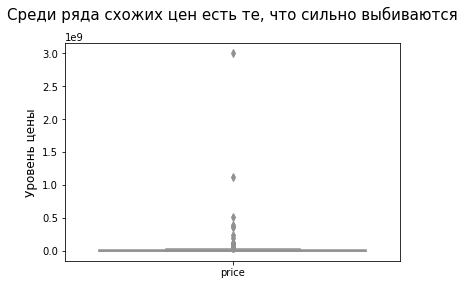

In [116]:
difference = banks[['price']]

sns.boxplot(data=difference,palette = 'light:b')

plt.title('Среди ряда схожих цен есть те, что сильно выбиваются\n',size = 15)
plt.ylabel('Уровень цены',size = 12)
plt.show()

Цены варьируются в пределах разнообразных значений. Из-за сильного разброса их визуализация не даст полезных для аналитики данных. По этой причине данные по ценам были разбиты на несколько категорий: 
* **Мелкие затраты:** 0 - 100 000 
* **Средние затраты:** 100 001 - 500 000 
* **Крупные затраты:** 500 001 - 1 000 000 
* **Масштабные затраты:** более 1 000 001

In [122]:
def price_group(value):
    if  value >= 0 and value <= 100000:
        value = 'Мелкие затраты'
    elif value > 100001 and value <= 500000:
        value = 'Средние затраты'
    elif value > 500001 and value <= 1000000:
        value = 'Крупные затраты'
    elif value > 1000001:
        value = 'Масштабные затраты'
    return value

In [123]:
banks['price_group'] = banks['price'].apply(price_group).copy()

In [124]:
banks

,date,price,regnum,start_date,end_date,customer,service,price_service,count_service,code,dateClean,year,price_group
0,2022-03-15T00:00:00,1184465.00,57707083893220018550000,2022-01-01,2023-12-31,"""СБЕРБАНК РОССИИ""",Договор теплоснабжения,1184465.0,1,35.30.11.111,2022-03-15,2022,Масштабные затраты
1,2022-03-15T00:00:00,1600980.00,57707083893220018660000,2022-03-15,2024-04-04,"""СБЕРБАНК РОССИИ""",Выполнение строительно-монтажных работ п,1600980.0,1,41.20,2022-03-15,2022,Масштабные затраты
2,2022-03-15T00:00:00,860000.00,57707083893220018680000,2022-03-15,2022-04-28,"""СБЕРБАНК РОССИИ""",Выполнение СМР на объектах банка,860000.0,1,41.20.40,2022-03-15,2022,Крупные затраты
3,2022-03-15T00:00:00,6376740.00,57707083893220018690000,2022-03-15,2025-06-15,"""СБЕРБАНК РОССИИ""",Выполнение СМР на объектах банка,6376740.0,1,41.20.40,2022-03-15,2022,Масштабные затраты
4,2022-03-15T00:00:00,2792832.85,57707083893220018700000,2022-01-01,2025-12-31,"""СБЕРБАНК РОССИИ""",Теплоснабжение,2792832.85,1,35.30.11.111,2022-03-15,2022,Масштабные затраты
...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,2018-02-12T00:00:00,2867760.00,73232005484180001020000,2018-02-12,{'attachments': {'attachment': [{'url': 'https...,"""ПОЧТА БАНК""","Изделия для праздников, карнавалов или прочие ...","{'OKEI': {'code': '796', 'name': 'Штука'}, 'OK...",2980,32.99.51,2018-02-12,2018,Масштабные затраты
246,2018-02-07T00:00:00,55513450.26,73232005484180001000000,2018-02-07,{'attachments': {'attachment': [{'url': 'https...,"""ПОЧТА БАНК""","Терминалы кассовые, подключаемые к компьютеру ...","{'OKEI': {'code': '796', 'name': 'Штука'}, 'OK...",8618,26.20.12.110,2018-02-07,2018,Масштабные затраты
247,2018-02-05T00:00:00,808000.00,73232005484180000990000,{'attachments': {'attachment': [{'url': 'https...,{'attachments': {'attachment': [{'url': 'https...,"""ПОЧТА БАНК""","Услуги по обработке данных, размещению и взаим...","{'OKEI': {'code': '876', 'name': 'Условная еди...",1,63.1,2018-02-05,2018,Крупные затраты
248,2018-01-30T00:00:00,15000000.00,73232005484180001010000,2018-01-30,{'attachments': {'attachment': [{'url': 'https...,"""ПОЧТА БАНК""",Услуги рекламные,"{'OKEI': {'code': '876', 'name': 'Условная еди...",1,73.1,2018-01-30,2018,Масштабные затраты


In [128]:
banks['price_group'].value_counts().to_frame()

,price_group
Масштабные затраты,198
Крупные затраты,26
Средние затраты,14
Мелкие затраты,12


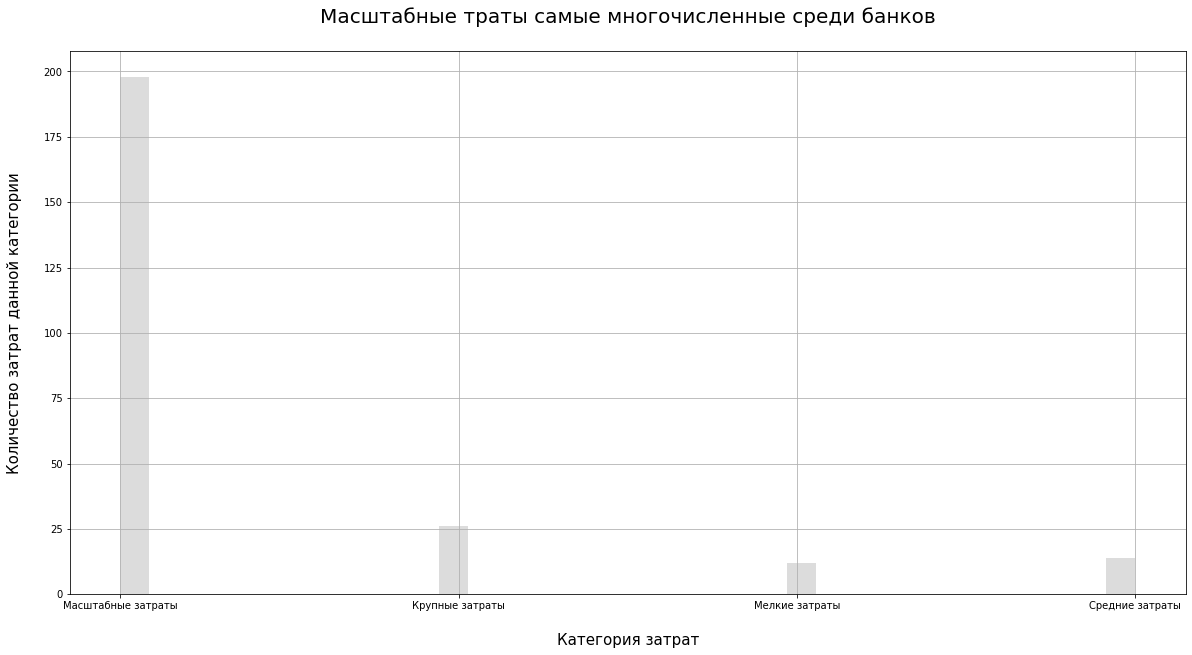

In [135]:
banks['price_group'].hist(figsize=(20,10),color = 'gainsboro', bins = 35)

plt.title('Масштабные траты самые многочисленные среди банков\n',size = 20)
plt.xlabel('\nКатегория затрат',size = 15)
plt.ylabel('Количество затрат данной категории\n',size = 15)
plt.show()

Мы создали отдельную колонку и выяснили, что масштабные затраты у банков явно превалируют среди остальных категорий затрат.

## Выводы: 

1. **Наша гипотеза подтвердилась**. Действительно, **затраты на информационную безопасность у банков существенны**. Разработка, доработка, настройка и внедрение ПО для информационной безопасности, а также информационно-консультационные IT-услуги и услуги по обеспечению информационной безопасности являются самыми дорогостоящими из представленного списка. 


2. Услуги по обеспечению информационной безопасности являются также **одними из самых запрашиваемых услуг**, уступая по количеству лишь услугам по постоянному трудоустройству (кроме услуг по поиску руководящих работников).


3. По общей сумме затрат можно определить, что **Банк ВТБ тратит большие суммы** (в разрезе имеющихся данных). 


4. Самыми **интересными позициями** среди трат у банков стали: пластмассовое ведро, жесткий диск HP, смартфон VSMART Joy и кресло руководителя - Аляска СН-153.

In [138]:
banks.to_csv('Контракты банков.csv', index=True)